### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

### Load data from file

In [2]:
originalBData = pd.read_csv('bank.csv')

In [3]:
bData = originalBData.copy()

### Review data 

In [4]:
bData.shape

(10000, 14)

In [5]:
bData.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
bData.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


#### Check for null values

In [7]:
bData.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Check for duplicated values

In [8]:
bData[bData.duplicated(['CustomerId'])]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


### Distinguish the features and target variable

#### x and y dataframes have not IDs features (RowNumber 	CustomerId)

In [9]:
x = bData.iloc[:,3:13]
y = bData.iloc[:,13]

In [10]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### Encode Gender 
#### Gender: 0 - Female, 1 - Male

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
lencoder1 = LabelEncoder()
x['Gender'] = lencoder1.fit_transform(x['Gender'])

### Dummy variable for Geography Features

In [14]:
x = pd.get_dummies(x, columns=['Geography'], prefix = '', prefix_sep = '')

In [15]:
x.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
5,645,1,44,8,113755.78,2,1,0,149756.71,0,0,1
6,822,1,50,7,0.00,2,1,1,10062.80,1,0,0
7,376,0,29,4,115046.74,4,1,0,119346.88,0,1,0
8,501,1,44,4,142051.07,2,0,1,74940.50,1,0,0
9,684,1,27,2,134603.88,1,1,1,71725.73,1,0,0


### Divide the data set into training and test sets

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 27)

### Normalize the train and test data

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Import Tensorflow and Keras libraries

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix

#### Function in wich the model is defined, built, measure accuracy and plot heatmap and loss & accuracy / epoch

In [60]:
def runANN(myBatchSize = 10, myEpochs = 10, Neurons1 = 12, Neurons2 = 6):
    
    #Define the subplot
    fig = plt.figure(figsize=(15, 6))
    
    #Define Sequential Model
    model = Sequential()
    
    #Add hidden layers
    model.add(Dense(Neurons1, input_shape = (X_test.shape[1],), activation = 'relu')) # hidden layer 2
    model.add(Dense(Neurons2, activation='relu')) # hidden layer 2
    #Add  output layer
    model.add(Dense(1, activation='sigmoid')) # output layer
    
    #Build the model 
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #Fit the model 
    history = model.fit(X_train, y_train.values, batch_size=myBatchSize, epochs=myEpochs, verbose=0);
    hist  = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    #Evalute model
    res = model.evaluate(X_test, y_test.values, verbose=0)
    print(' Accuracy {:02.2f}% - Loss {:02.2f}%'.format(res[1]*100, res[0]*100))
    
    #Predict results with .5 threshold
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5)
    
    #Plot the confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    fig.add_subplot(121)
    plt.title('Heatmap', fontsize=14)
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1]);
    
    #Plot the Accuracy & Loss    
    fig.add_subplot(122)
    plt.title('Accuracy&Loss / Epochs', fontsize=14)
    plt.plot(hist['loss'])
    plt.plot(hist['accuracy'])
    plt.legend(('loss', 'accuracy') , loc =0)
    
    #Shows the sumary for the model
    model.summary()

 Accuracy 86.20% - Loss 34.10%
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_52 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 7         
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


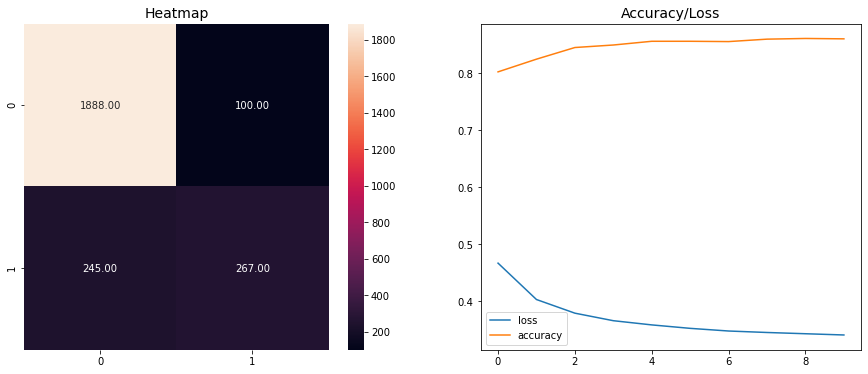

In [61]:
 # Initial model : 
    #2 hidden layers: ReLU Activation Function (12 neurons)
    #1 output layer:: Sigmoid Activation Function (6 neurons)
    #Adam optimizar
    #Binary Cross Entropy Loss function
    #Accuracy metric
runANN()

 Accuracy 85.76% - Loss 34.21%
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 24)                312       
_________________________________________________________________
dense_55 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 13        
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


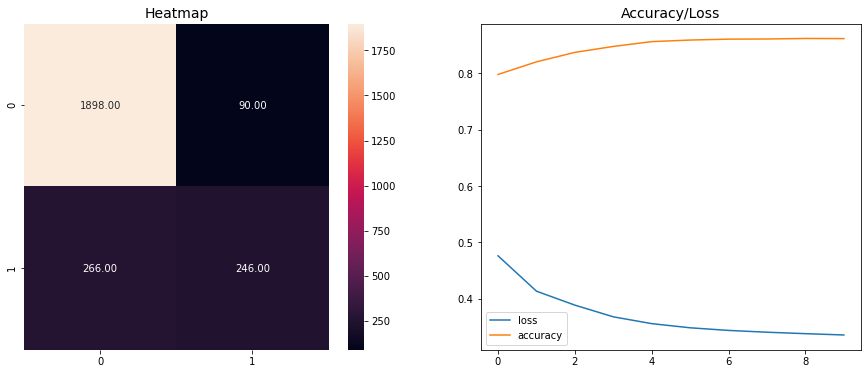

In [62]:
 # Increassing neurons on both layers model : 
    #2 hidden layers: ReLU Activation Function (12 neurons)
    #1 output layer:: Sigmoid Activation Function (6 neurons)
    #Adam optimizar
    #Binary Cross Entropy Loss function
    #Accuracy metric
runANN(20, 10, 24, 12)

 Accuracy 86.44% - Loss 34.06%
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 14)                182       
_________________________________________________________________
dense_109 (Dense)            (None, 4)                 60        
_________________________________________________________________
dense_110 (Dense)            (None, 1)                 5         
Total params: 247
Trainable params: 247
Non-trainable params: 0
_________________________________________________________________


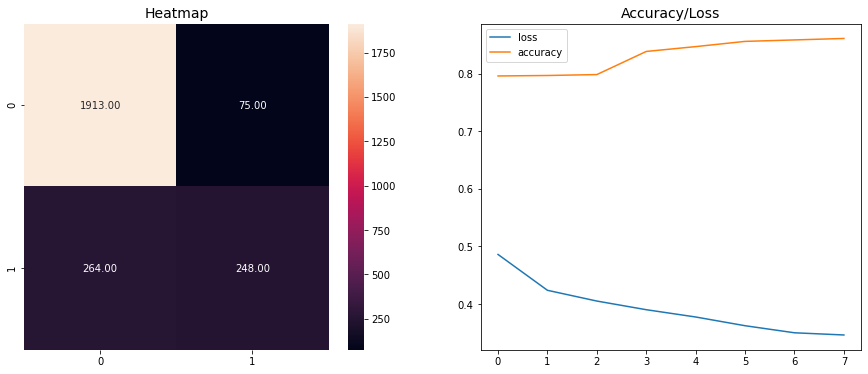

In [80]:
 # Best fittin model: 
    #2 hidden layers: ReLU Activation Function (14 neurons)
    #1 output layer:: Sigmoid Activation Function (4 neurons)
    #Adam optimizar
    #Binary Cross Entropy Loss function
    #Accuracy metric
runANN(10, 8, 14, 4)

# Conclution:

### With this model, we can predict with 86.44% of accuracy the Churn Rate or Attrition Rate. 
### To achieve this, we use an Artificial Neural Network fully connected with 2 hidden layers activated by a ReLU function, with 14 and 4 neurons respectively. One output layer activated by a Sigmoid function.